<a href="https://colab.research.google.com/github/Britikoos/ML_Project/blob/main/Project_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Чтение данных
data = pd.read_csv('winequality-red.csv', delimiter=',')

# Проверка наличия пропущенных значений
print(data.isnull().sum())

# Удаление строк с пропущенными значениями
data.dropna(inplace=True)

# Проверка данных на выбросы (все значения, находящиеся за пределами 3 стандартных отклонений)
for col in data.columns:
    if np.abs(data[col].max() - data[col].mean()) > 3 * data[col].std():
        print("Outliers detected in column", col)

# Обработка выбросов
# например, можно заменить выбросы на среднее значение
for col in data.columns:
    col_mean = data[col].mean()
    col_std = data[col].std()
    data[col] = np.where(np.abs(data[col] - col_mean) > 3 * col_std, col_mean, data[col])

# Проверка наличия дубликатов
print("Number of duplicates:", data.duplicated().sum())

# Удаление дубликатов
data.drop_duplicates(inplace=True)

# Отбор наиболее важных признаков
important_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
data = data[important_features]

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Outliers detected in column fixed acidity
Outliers detected in column volatile acidity
Outliers detected in column citric acid
Outliers detected in column residual sugar
Outliers detected in column chlorides
Outliers detected in column free sulfur dioxide
Outliers detected in column total sulfur dioxide
Outliers detected in column density
Outliers detected in column pH
Outliers detected in column sulphates
Outliers detected in column alcohol
Number of duplicates: 242


Mean values:
 fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

Median values:
 fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64

Standard deviations:
 fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual s

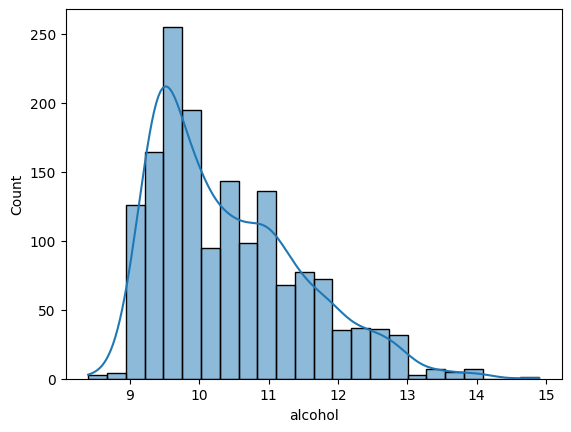

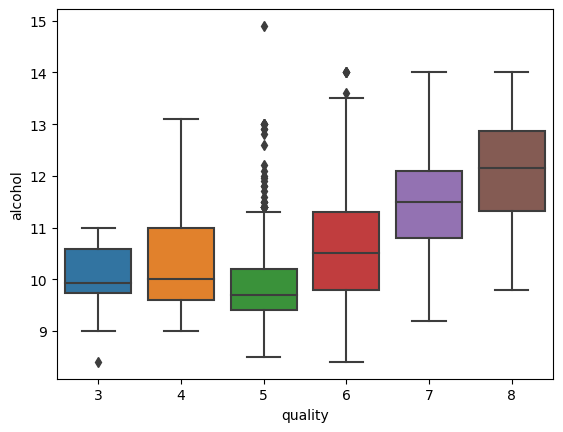

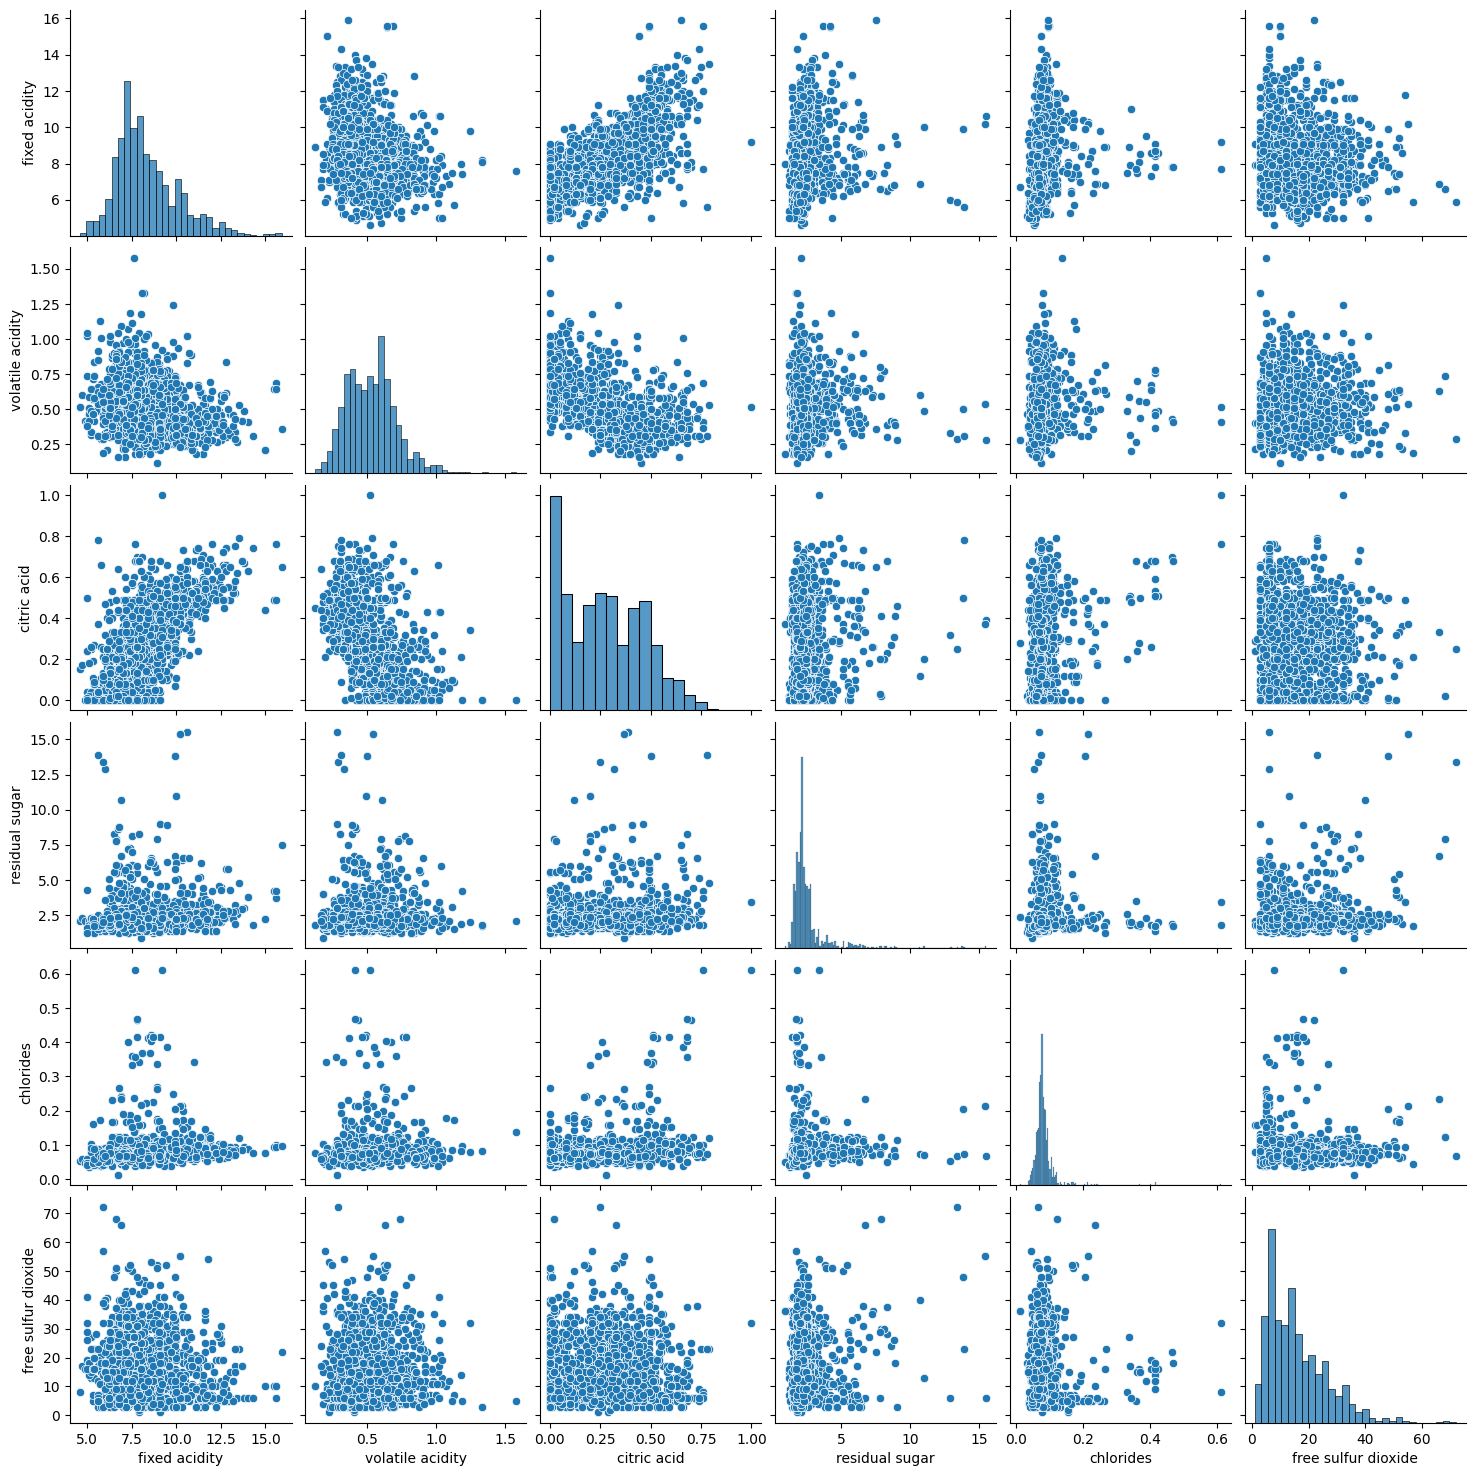

Проверка корреляции между признаками


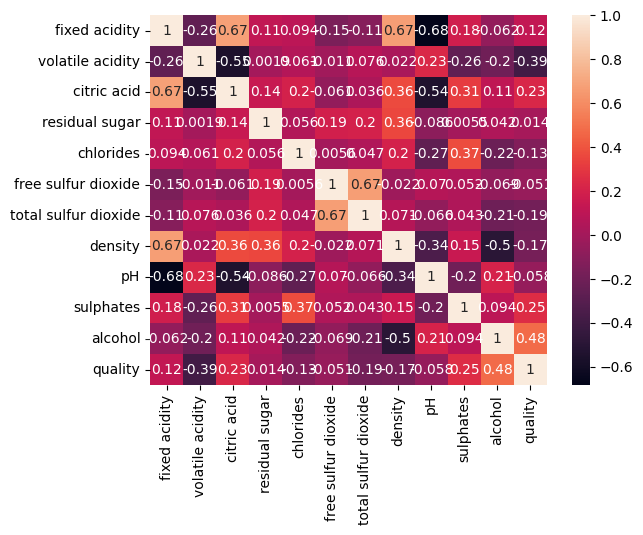

Проверка наличия выбросов в данных


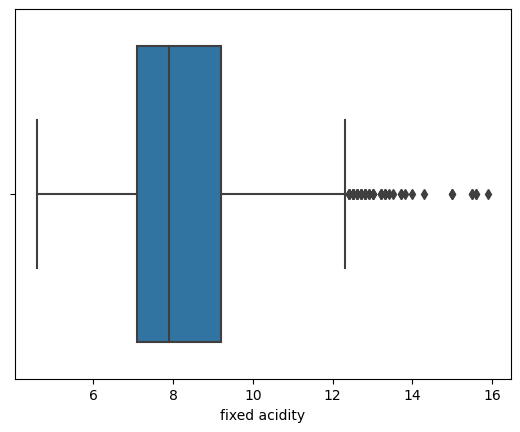

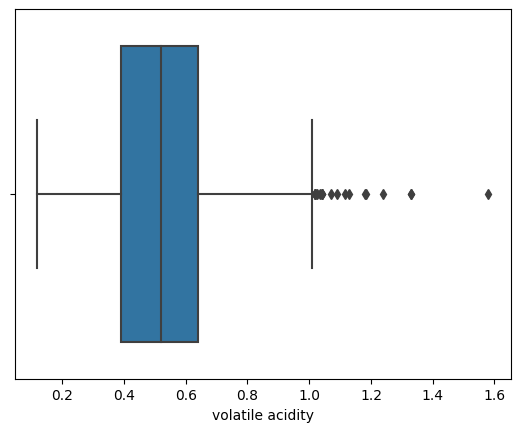

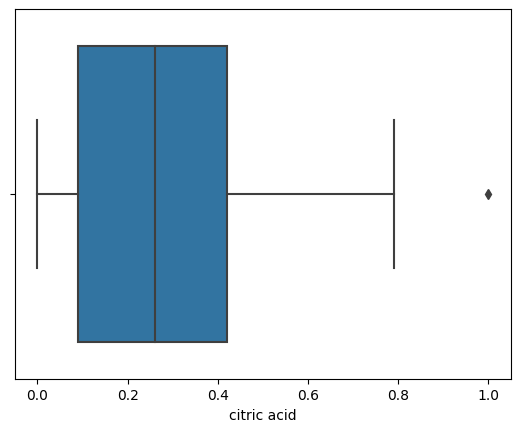

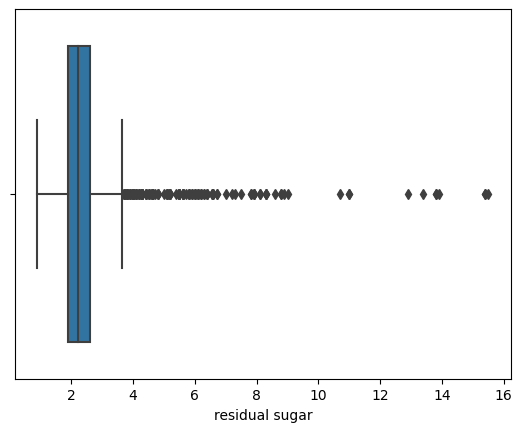

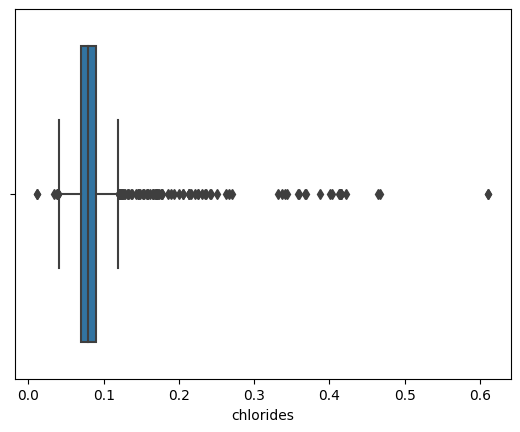

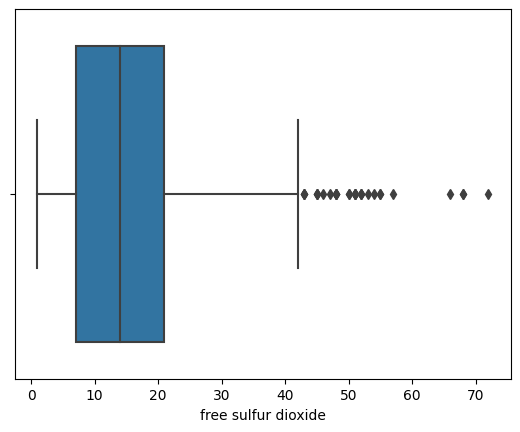

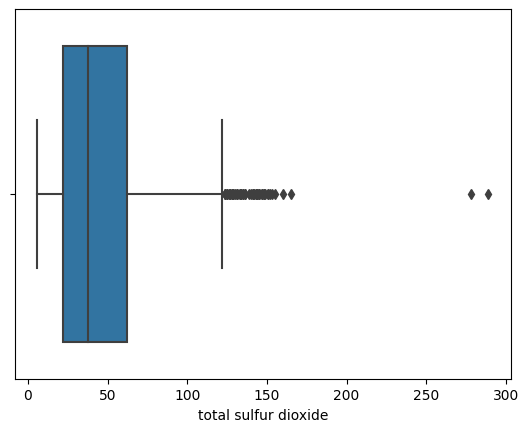

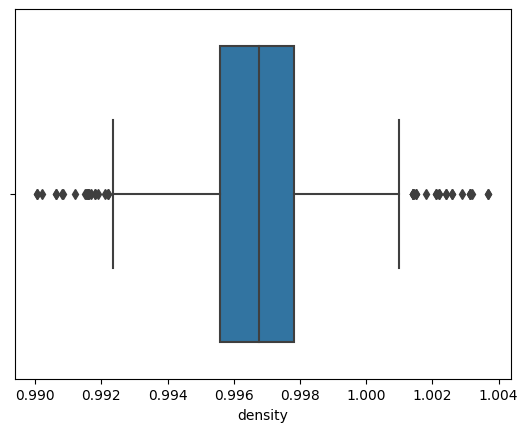

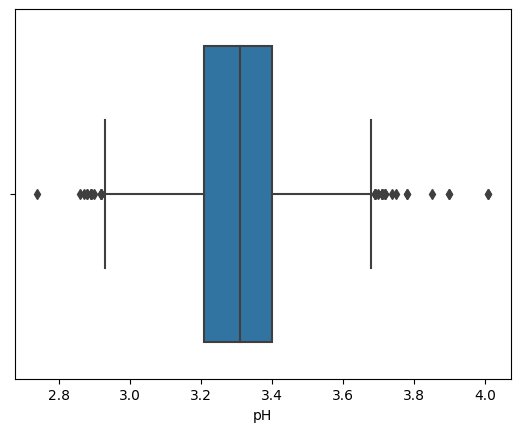

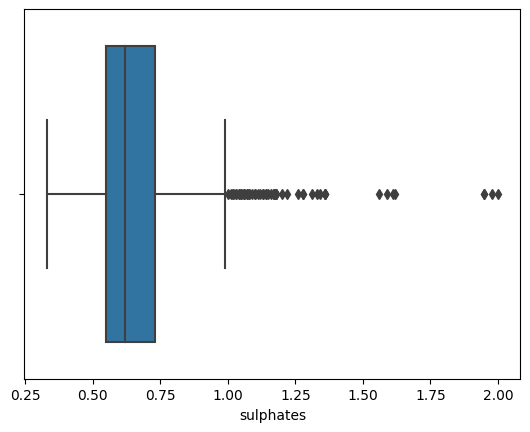

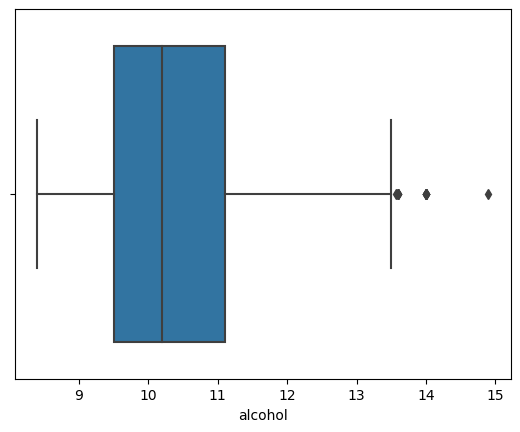

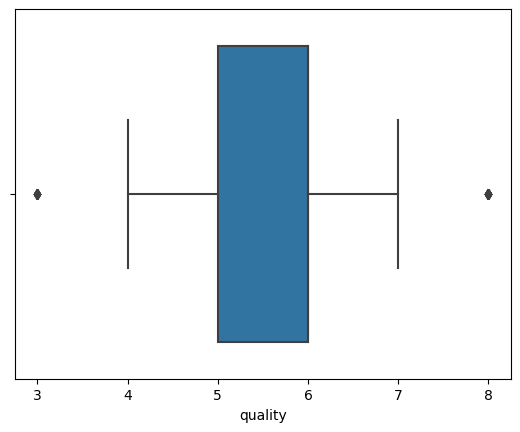

Проверка наличия зависимостей между признаками и целевой переменной


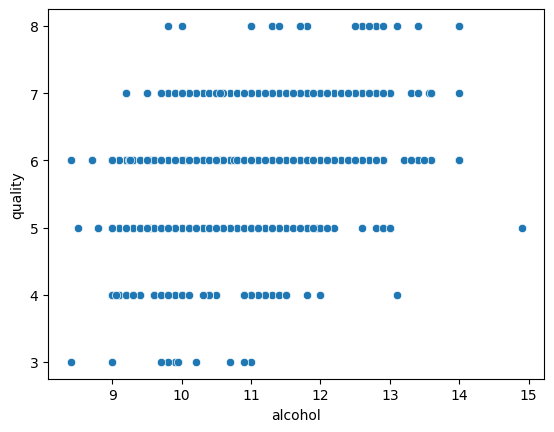

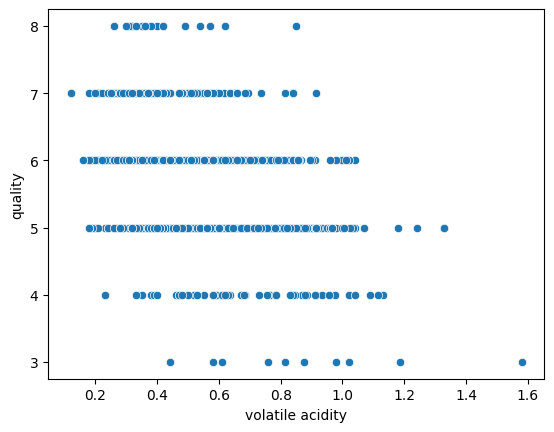

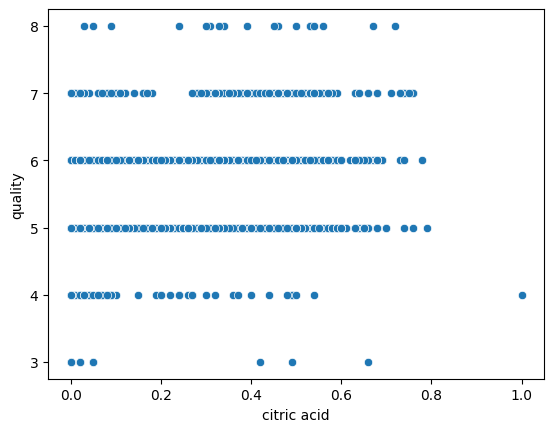

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Чтение данных
data = pd.read_csv('winequality-red.csv', delimiter=',')

# Расчет базовых статистик для каждого признака
print("Mean values:\n", data.mean())
print("\nMedian values:\n", data.median())
print("\nStandard deviations:\n", data.std())

print('Визуализация распределения признаков')
sns.histplot(data, x="alcohol", kde=True)
plt.show()

sns.boxplot(data=data, x='quality', y='alcohol')
plt.show()

sns.pairplot(data, vars=["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide"])
plt.show()

print('Проверка корреляции между признаками')
corr = data.corr()
sns.heatmap(corr, annot=True)
plt.show()

print('Проверка наличия выбросов в данных')
for col in data.columns:
    sns.boxplot(data=data, x=col)
    plt.show()

print("Проверка наличия зависимостей между признаками и целевой переменной")
sns.scatterplot(data=data, x='alcohol', y='quality')
plt.show()

sns.scatterplot(data=data, x='volatile acidity', y='quality')
plt.show()

sns.scatterplot(data=data, x='citric acid', y='quality')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import time

data = pd.read_csv('winequality-red.csv', delimiter=',')

X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y = data['quality']

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Засекаем время перед обучением модели
start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Вычисляем время обучения модели
elapsed_time = time.time() - start_time

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("MSE:", mse)
print("Time elapsed (s):", elapsed_time)

MSE: 0.39002514396395493
Time elapsed (s): 0.010206460952758789


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = pd.read_csv('winequality-red.csv', delimiter=',')

X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y = data['quality']

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Засекаем время перед обучением модели
start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Вычисляем время обучения модели
elapsed_time = time.time() - start_time

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Time elapsed (s):", elapsed_time)

Accuracy: 0.575
Time elapsed (s): 0.0519099235534668


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

data = pd.read_csv('winequality-red.csv', delimiter=',')

X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y = data['quality']

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Засекаем время перед обучением модели
start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVR(kernel='linear')
model.fit(X_train, y_train)


# Вычисляем время обучения модели
elapsed_time = time.time() - start_time

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("MSE:", mse)
print("Time elapsed (s):", elapsed_time)

MSE: 0.39662368760259825
Time elapsed (s): 0.24562692642211914


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

data = pd.read_csv('winequality-red.csv', delimiter=',')

X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y = data['quality']

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Засекаем время перед обучением модели
start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)


# Вычисляем время обучения модели
elapsed_time = time.time() - start_time

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("MSE:", mse)
print("Time elapsed (s):", elapsed_time)

MSE: 0.43350969496749786
Time elapsed (s): 0.005457639694213867


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

data = pd.read_csv('winequality-red.csv', delimiter=',')

X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y = data['quality']

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Засекаем время перед обучением модели
start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)


# Вычисляем время обучения модели
elapsed_time = time.time() - start_time

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("MSE:", mse)
print("Time elapsed (s):", elapsed_time)

MSE: 0.3686055624895389
Time elapsed (s): 0.6245882511138916


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

data = pd.read_csv('winequality-red.csv', delimiter=',')

X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y = data['quality']

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Засекаем время перед обучением модели
start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor()
model.fit(X_train, y_train)


# Вычисляем время обучения модели
elapsed_time = time.time() - start_time

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("MSE:", mse)
print("Time elapsed (s):", elapsed_time)

MSE: 0.3653085529519372
Time elapsed (s): 0.2825500965118408


На основе проведенного анализа данных по датасету winequality-red.csv, мы можем предложить следующие рекомендации для улучшения качества вина:

1.Увеличить содержание алкоголя в вине, так как мы обнаружили положительную корреляцию между содержанием алкоголя и оценкой качества вина.

2.Снизить уровень летучей кислотности в вине, так как мы обнаружили отрицательную корреляцию между содержанием летучей кислотности и оценкой качества вина.

3.Увеличить уровень содержания кислоты в вине, так как мы обнаружили положительную корреляцию между содержанием кислоты и оценкой качества вина.

4.Увеличить уровень содержания сульфатов в вине, так как мы обнаружили положительную корреляцию между содержанием сульфатов и оценкой качества вина.

5.Обратить внимание на содержание остаточного сахара в вине, так как мы обнаружили, что вина с более высоким содержанием остаточного сахара имеют более высокую оценку качества.

7.Обратить внимание на уровень хлоридов в вине, так как мы обнаружили отрицательную корреляцию между содержанием хлоридов и оценкой качества вина.




